In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dat1 = pd.read_csv('ratingsSaina.csv')
dat = dat1[(dat1.TitleType=='Feature Film')|(dat1.TitleType=='TV Movie')]
dat.head()

,position,const,created,modified,description,Title,TitleType,Directors,MyRating,IMDbRating,Runtime,Year,Genres,NumVotes,ReleaseDate (month/day/year),URL
0,1,tt0416960,Sat Jul 16 00:00:00 2016,NaN,NaN,The Lizard,Feature Film,Kamal Tabrizi,10,8.6,115.0,2004,"comedy, drama",5960,2004-02-04,http://www.imdb.com/title/tt0416960/
1,2,tt0499537,Sat Jul 16 00:00:00 2016,NaN,NaN,Offside,Feature Film,Jafar Panahi,7,7.3,93.0,2006,"comedy, drama, sport",5833,2006-02-17,http://www.imdb.com/title/tt0499537/
2,3,tt0845439,Sat Jul 16 00:00:00 2016,NaN,NaN,Fireworks Wednesday,Feature Film,Asghar Farhadi,8,8.0,102.0,2006,"drama, mystery",4680,2006-02-08,http://www.imdb.com/title/tt0845439/
3,4,tt0112445,Sat Jul 16 00:00:00 2016,NaN,NaN,The White Balloon,Feature Film,Jafar Panahi,10,7.8,85.0,1995,"drama, family",4673,May-95,http://www.imdb.com/title/tt0112445/
4,5,tt0191043,Sat Jul 16 00:00:00 2016,NaN,NaN,The Color of Paradise,Feature Film,Majid Majidi,8,8.2,90.0,1999,"adventure, drama, family",11098,1999-02-08,http://www.imdb.com/title/tt0191043/


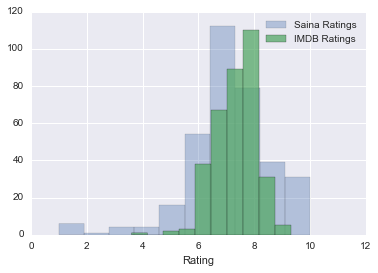

In [5]:
plt.hist(dat.MyRating.reset_index(drop=True), alpha=0.35, label = "Saina Ratings")
plt.hist(dat.IMDbRating.reset_index(drop=True), alpha=0.75, label = "IMDB Ratings")
plt.legend()
plt.xlabel('Rating')
plt.show()


In [6]:
import numpy as np
#set(dat.Genres)
### lets use the first two genres to group movies
gn = dat.Genres.str.split(',').str[0]
#gnr = pd.DataFrame(gn, index=range(dat.Year.count()), columns=['Gr'])
data = pd.concat([dat,gn],axis=1)
data.columns.values[-1]="GR"
data.GR.head()

0       comedy
1       comedy
2        drama
3        drama
4    adventure
Name: GR, dtype: object

MyRating,1,2,3,4,5,6,7,8,9,10
GR,,,,,,,,,,
action,2.0,NaN,NaN,1.0,NaN,10.0,10.0,2.0,1.0,NaN
adventure,1.0,NaN,NaN,NaN,1.0,2.0,2.0,4.0,1.0,NaN
animation,NaN,NaN,NaN,NaN,NaN,1.0,5.0,5.0,5.0,1.0
biography,NaN,NaN,NaN,NaN,2.0,4.0,8.0,11.0,4.0,6.0
comedy,1.0,NaN,NaN,NaN,4.0,15.0,23.0,9.0,2.0,3.0
crime,1.0,NaN,NaN,NaN,2.0,3.0,4.0,6.0,2.0,2.0
drama,NaN,1.0,4.0,3.0,6.0,19.0,58.0,41.0,21.0,16.0
fantasy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


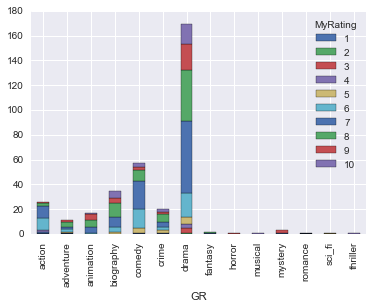

In [7]:
b = data.groupby('GR').MyRating.value_counts()
b.unstack().plot(kind='bar',stacked=True)
b.unstack()

In [8]:
## lets level the genres and cobmine the rare ones
#level = pd.DataFrame(0,index=range(len(data.GR)),columns=['GR_Code'])
import warnings
warnings.filterwarnings('ignore')

data.GR[(data.GR=='thriller')|(data.GR=='sci_fi')|(data.GR=='romance')|(data.GR=='mystery')|(data.GR=='musical')
       |(data.GR=='horror')|(data.GR=='fantasy')|(data.GR=='adventure')]='T'
data.GR[(data.GR=='action')|(data.GR=='crime')]='F'
data.GR[(data.GR=='biography')]='B'
data.GR[(data.GR=='animation')]='A'
data.GR[(data.GR=='comedy')]='C'
data.GR[(data.GR=='drama')]='D'

In [9]:
zhanr = data['GR'].str.join(sep='*').str.get_dummies(sep='*')
zhanr.head()

,A,B,C,D,F,T
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1


In [12]:
MyVote = dat.MyRating-np.mean(dat.MyRating)
UserVote = dat.IMDbRating-(sum(dat.IMDbRating*dat.NumVotes)/sum(dat.NumVotes))

movies = pd.concat([MyVote,UserVote,dat.NumVotes,dat.Year,dat.Runtime,zhanr],axis=1)
MScaled = movies.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
MScaled.head()

,MyRating,IMDbRating,NumVotes,Year,Runtime,A,B,C,D,F,T
0,0.302826,0.220160,-0.099322,0.019024,0.001691,-0.049133,-0.101156,0.83526,-0.488439,-0.132948,-0.060694
1,-0.030507,-0.007910,-0.099398,0.044340,-0.132456,-0.049133,-0.101156,0.83526,-0.488439,-0.132948,-0.060694
2,0.080604,0.114897,-0.100085,0.044340,-0.077578,-0.049133,-0.101156,-0.16474,0.511561,-0.132948,-0.060694
3,0.302826,0.079809,-0.100089,-0.094900,-0.181236,-0.049133,-0.101156,-0.16474,0.511561,-0.132948,-0.060694
4,0.080604,0.149985,-0.096260,-0.044267,-0.150748,-0.049133,-0.101156,-0.16474,-0.488439,-0.132948,0.939306
